# Task4 HYPERSPECTRAL CLASSIFICATION——PART1

### 本任务的目的是学习高光谱数据的处理构建语义分割网络实现高光谱分类。

1. 了解遥感数据读写方法
2. 高光谱处理技术
3. 样本增广策略
4. 大区域目标推理策略

In [ ]:
import cv2
import numpy as np
import  os,sys
from osgeo import gdal
from gdalconst import *
import matplotlib.pyplot as plt
from PIL import Image
import sys, time  
import matplotlib
import scipy.misc
import glob
import shutil
import h5py
from random import shuffle
from utils import *

In [2]:
out_dir='Y:\\Deep learning teaching\\task4\\data\\'
inputdata='Y:\\Deep learning teaching\\task4\\data\\hyper_pca_6b_5c.tif'
img_file, img_bands, img_height, img_width, img_arr, geomatrix, projection = Load_image_by_Gdal(inputdata)
img_arr.shape
name={'elese':0,'rice':1,'corn':2,'otherplants':3,'bareland':4}

(5034, 5348, 7) (5034, 5348)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


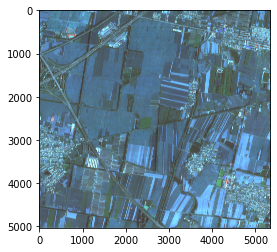

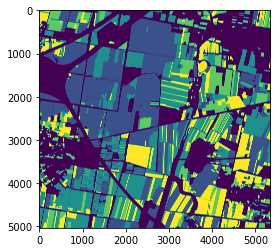

In [20]:
finaldata=img_arr.transpose(( 1, 2,0))
label=img_arr[-1,:,:]
print(finaldata.shape,label.shape)
plt.imshow((img_arr[0:3,:,:]).transpose(( 1, 2,0))/2000.0)
plt.show()
plt.imshow(label)
plt.show()

processing....patch:0...No.:10
processing....patch:0...No.:20
processing....patch:0...No.:30
processing....patch:0...No.:40
processing....patch:0...No.:50
processing....patch:0...No.:60
processing....patch:0...No.:70
processing....patch:0..Total.No.:(72, 256, 256, 7)
(256, 72, 256, 7) (72, 256, 256, 7) (256, 72, 256, 7)
(72, 256, 256, 7) (72, 256, 256, 7) (72, 256, 256, 7)
(288, 256, 256, 7)


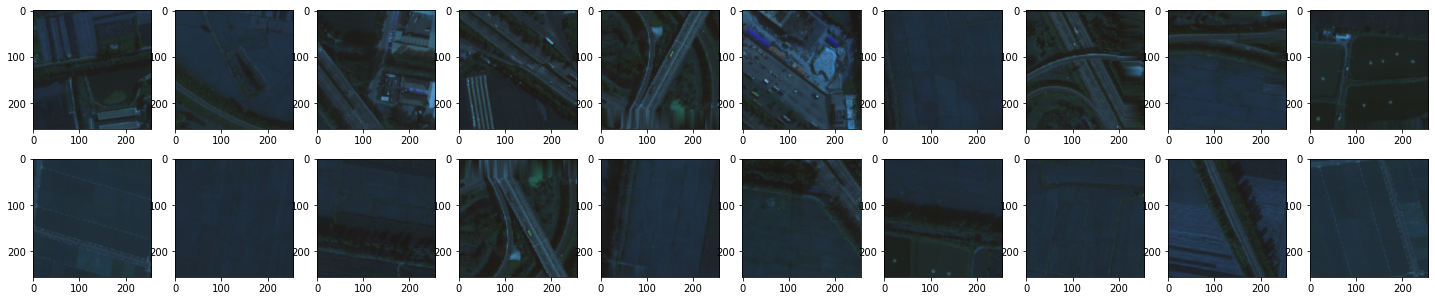

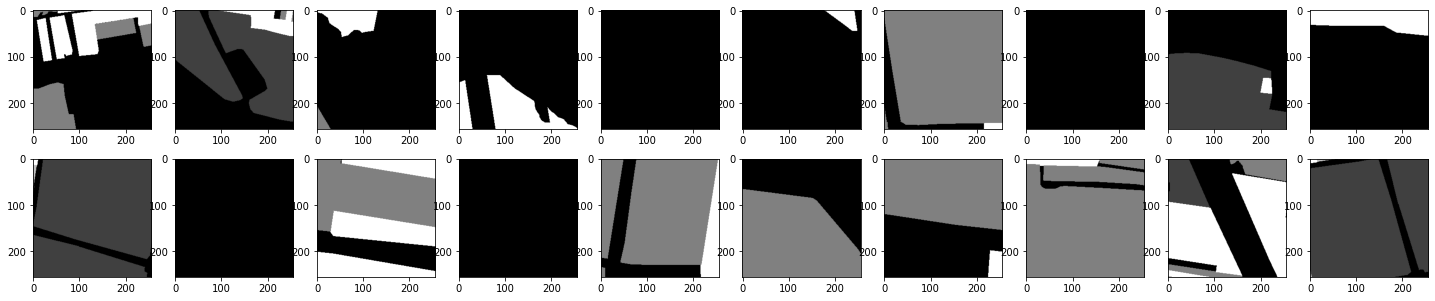

(288, 256, 256, 7)


In [22]:
regular_arr=regular_crop(finaldata,256,step=512)
image_roate=rotate(regular_arr)
final_data=np.concatenate((image_roate,regular_arr), axis = 0)
final_data=suffle_data(final_data)
plot_func_20(final_data[:,:,:,0:3]/5000,final_data[:,:,:,-1])
print(final_data.shape)

In [23]:
hdf5_path = out_dir+'hyper_pca_6b_4c_288.hdf5'  # address to where you want to save the hdf5 file
f = h5py.File(hdf5_path, mode='w')
f['image'] = final_data[:,:,:,:-1]
f['label'] = final_data[:,:,:,-1]
f.close()